In [23]:
import pandas as pd

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# matplot에서 한글폰트 깨짐현상 해결
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = 'c://Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [24]:
통합데이터 = pd.read_csv("../data/통합데이터.csv")

In [25]:
통합데이터_피벗 = pd.pivot_table(통합데이터, index=["대여소명","시","거치대총개수"], values="거치수량")
통합데이터_피벗.reset_index(inplace=True)

In [26]:
대여소명 = 통합데이터_피벗["대여소명"].unique()

## 거치초과율 계산

In [27]:
거치초과율 = []
거치초과량 = []
거치이하량 = []
거치대총개수 = []
for i in 대여소명:
    tmp = 통합데이터_피벗[통합데이터_피벗["대여소명"] == i] 
    거치초과량_ = len(tmp[tmp["거치수량"] > tmp["거치대총개수"].iloc[0]])
    거치이하량_ = len(tmp[tmp["거치수량"] <= tmp["거치대총개수"].iloc[0]])
    
    거치초과량.append(거치초과량_)
    거치이하량.append(거치이하량_)
    
    거치대총개수.append(tmp["거치대총개수"].iloc[0])
    거치초과율.append(거치초과량_/(거치초과량_+거치이하량_))

In [28]:
대여소별특성1 = pd.DataFrame({"대여소명":대여소명, "거치초과율":거치초과율,"거치대총개수":거치대총개수})

In [29]:
tmp__ = pd.DataFrame({"대여소명":대여소명, "거치초과율":거치초과율,"거치초과량":거치초과량,"거치이하량":거치이하량,"거치대총개수":거치대총개수})

In [30]:
tmp__

,대여소명,거치초과율,거치초과량,거치이하량,거치대총개수
0,강변역 4번출구 뒤,0.000000,0,24,19
1,건국대학교 (입학정보관),0.166667,4,20,10
2,건국대학교 (행정관),0.208333,5,19,5
3,건국대학교 과학관(이과대) 앞,0.333333,8,16,10
4,건국대학교 학생회관,0.250000,6,18,15
5,광나루역 3번 출구,0.000000,0,24,10
6,광남중학교,0.000000,0,24,20
7,광양중학교 앞,0.000000,0,24,10
8,광진경찰서,0.500000,12,12,10
9,광진광장 교통섬,0.000000,0,24,20


## Solution 적용

In [31]:
import numpy as np
import math

In [32]:
보정거치대개수 = []
거치대총개수 = []

for i in 대여소명:
    tmp = 통합데이터[통합데이터["대여소명"] == i]
    tmp2 = pd.pivot_table(data=tmp, index=["시"],values="거치수량")-tmp["거치대총개수"].iloc[0]
    추가_거치대개수 = round(np.mean(tmp2[tmp2["거치수량"]>=0])).iloc[0]

    if math.isnan(추가_거치대개수) ==True:
        추가_거치대개수=0
    거치대총개수.append(tmp["거치대총개수"].iloc[0])   
    보정거치대개수.append(추가_거치대개수 + tmp["거치대총개수"].iloc[0])

In [33]:
대여소별특성2 = pd.DataFrame({"대여소명":대여소명,"보정거치대개수":보정거치대개수})

## 보정 후 거치초과율 계산

In [34]:
통합데이터_피벗 = pd.merge(통합데이터_피벗, 대여소별특성2)

In [35]:
보정거치초과율 = []

for i in 대여소명:
    tmp = 통합데이터_피벗[통합데이터_피벗["대여소명"] == i] 
    거치초과량 = len(tmp[tmp["거치수량"] > tmp["보정거치대개수"].iloc[0]])
    거치이하량 = len(tmp[tmp["거치수량"] <= tmp["보정거치대개수"].iloc[0]])

    보정거치초과율.append(거치초과량/(거치초과량+거치이하량))
    

In [36]:
대여소별특성3 = pd.DataFrame({"대여소명":대여소명,"보정거치초과율":보정거치초과율})

## 대여소별 상관계수

In [37]:
상관계수 = []
for i in 대여소명:
    tmp = 통합데이터[통합데이터["대여소명"] == i]
    tmp2 = np.corrcoef(tmp["반납수"], tmp["대여수"])[0,1]
    상관계수.append(tmp2)

In [38]:
대여소별특성4 = pd.DataFrame({"대여소명":대여소명,"상관계수":상관계수})

In [39]:
중곡지점 = 통합데이터[통합데이터["대여소명"] == "중앙농협 중곡지점"]

## 반납율 & 대여율

In [47]:
이용율 = pd.pivot_table(data=통합데이터, index=["대여소명"], values=["반납수","대여수"], aggfunc="sum")
이용율.reset_index(inplace=True)

In [48]:
이용율["반납율"] = 이용율["반납수"] / (이용율["반납수"]+이용율["대여수"])
이용율["대여율"] = 이용율["대여수"] / (이용율["반납수"]+이용율["대여수"])

In [49]:
대여소별특성5= 이용율[["대여소명","반납율","대여율"]]

## 대여소별특성 1,2,3,4,5 병합

In [50]:
대여소별특성 = pd.merge(대여소별특성1, 대여소별특성2, on="대여소명")
대여소별특성 = pd.merge(대여소별특성, 대여소별특성3, on="대여소명")
대여소별특성 = pd.merge(대여소별특성, 대여소별특성4, on="대여소명")
대여소별특성 = pd.merge(대여소별특성, 대여소별특성5, on="대여소명")

In [51]:
대여소별특성= 대여소별특성.sort_values("보정거치초과율",ascending=False)

## 자전거 거치대수 이회차 보정(Solution 재활용)

In [52]:
통합데이터 = pd.merge(통합데이터,대여소별특성2,on="대여소명")

In [53]:
이회_보정거치대개수 = []

for i in 대여소명:
    tmp = 통합데이터[통합데이터["대여소명"] == i]
    tmp2 = pd.pivot_table(data=tmp, index=["시"],values="거치수량")-tmp["보정거치대개수"].iloc[0]
    추가_거치대개수 = round(np.mean(tmp2[tmp2["거치수량"]>=0])).iloc[0]

    if math.isnan(추가_거치대개수) ==True:
        추가_거치대개수=0
        
    이회_보정거치대개수.append(추가_거치대개수 + tmp["보정거치대개수"].iloc[0])

In [54]:
대여소별특성6 = pd.DataFrame({"대여소명":대여소명,"이회_보정거치대개수":이회_보정거치대개수})

In [55]:
통합데이터 = pd.merge(통합데이터,대여소별특성6, on="대여소명")

## 이회보정 후 보정거치초과율(보정거치초과율 재활용)

In [56]:
통합데이터_피벗 = pd.merge(통합데이터_피벗, 대여소별특성6)

In [57]:
이회_보정거치초과율 = []

for i in 대여소명:
    tmp = 통합데이터_피벗[통합데이터_피벗["대여소명"] == i] 
    거치초과량 = len(tmp[tmp["거치수량"] > tmp["이회_보정거치대개수"].iloc[0]])
    거치이하량 = len(tmp[tmp["거치수량"] <= tmp["이회_보정거치대개수"].iloc[0]])

    이회_보정거치초과율.append(거치초과량/(거치초과량+거치이하량))

In [58]:
대여소별특성7 = pd.DataFrame({"대여소명":대여소명,"이회_보정거치초과율":이회_보정거치초과율})

## 대여소별특성 병합

In [59]:
대여소별특성 = pd.merge(대여소별특성,대여소별특성7, on="대여소명")

In [60]:
대여소별특성 = pd.merge(대여소별특성,대여소별특성6, on="대여소명")

In [61]:
대여소별특성.sort_values("이회_보정거치초과율",ascending=False, inplace=True)

In [62]:
대여소별특성.head(1)

,대여소명,거치초과율,거치대총개수,보정거치대개수,보정거치초과율,상관계수,반납율,대여율,이회_보정거치초과율,이회_보정거치대개수
2,자양중앙나들목,0.625,5,14.0,0.416667,0.006752,0.564378,0.435622,0.25,16.0


In [63]:
대여소별특성 = 대여소별특성[["대여소명","거치대총개수","보정거치대개수","이회_보정거치대개수",\
              "거치초과율","보정거치초과율","이회_보정거치초과율","상관계수","반납율","대여율"]]

## (실험)그래프표현

In [66]:
# 건국대학교 (행정관)
행정관 = 통합데이터[통합데이터["대여소명"] == "건국대학교 (행정관)"]
y1= 행정관["거치대총개수"].iloc[0]
y2= 행정관["보정거치대개수"].iloc[0]

# 잠실대교북단 교차로
교차로 = 통합데이터[통합데이터["대여소명"] == "잠실대교북단 교차로"]
y3= 교차로["보정거치대개수"].iloc[0]
y4= 교차로["이회_보정거치대개수"].iloc[0]

# 자양중앙나들목
자양중앙나들목 = 통합데이터[통합데이터["대여소명"] == "자양중앙나들목"]
y5= 자양중앙나들목["거치대총개수"].iloc[0]
y6= 자양중앙나들목["보정거치대개수"].iloc[0]
y7= 자양중앙나들목["이회_보정거치대개수"].iloc[0]

# 건국대학교 (입학정보관)
입학정보관 = 통합데이터[통합데이터["대여소명"] == "건국대학교 (입학정보관)"]
y8= 입학정보관["거치대총개수"].iloc[0]
y9= 입학정보관["이회_보정거치대개수"].iloc[0]

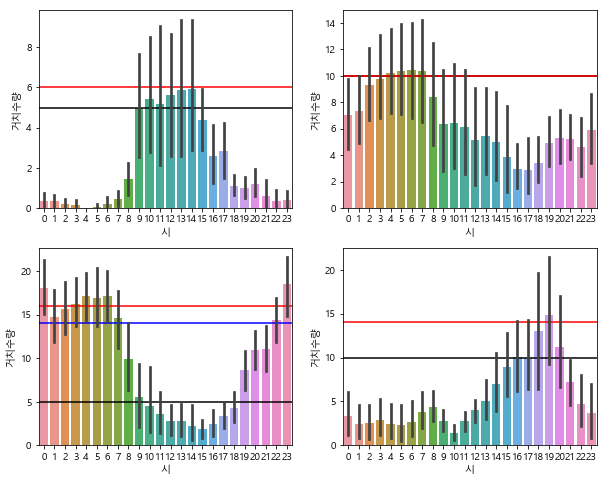

In [67]:
# 다중그래프 그리기
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(10, 8)

# 건국대학교 (행정관)
ax1.axhline(y=y1,color="black")
ax1.axhline(y=6,color="red")
sns.barplot(data=행정관, x="시", y="거치수량",ax=ax1)

# 잠실대교북단 교차로
ax2.axhline(y=y3,color="black")
ax2.axhline(y=y4,color="red")
sns.barplot(data=교차로, x="시", y="거치수량",ax=ax2)

# 자양중앙나들목
ax3.axhline(y=y5,color="black")
ax3.axhline(y=y6,color="blue")
ax3.axhline(y=y7,color="red")
sns.barplot(data=자양중앙나들목, x="시", y="거치수량",ax=ax3)

# 입학정보관
ax4.axhline(y=y8,color="black")
ax4.axhline(y=y9,color="red")
sns.barplot(data=입학정보관, x="시", y="거치수량",ax=ax4)